Import libraries and data file

In [1]:
import numpy as np #numerical computing
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #statistical visualization
import plotly.express as px #interactive visualization

In [2]:
from sklearn.model_selection import train_test_split #splitting data into train and test
from sklearn.ensemble import RandomForestClassifier #use decision tree to make prediction

#for sampling
from sklearn.utils import resample #method for resampling data

In [3]:
#SMOTE
from imblearn.over_sampling import SMOTE #oversampling imbalanced dataset
from sklearn.pipeline import make_pipeline #creating pipeline of machine learning model
from imblearn.pipeline import make_pipeline as make_pipeline_imb #
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter

#Evaluation
from sklearn import metrics #evaluate performace of machine learning model

import warnings #suppress warning messages during code execution
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../System Manager/Python/Life_insurance_train.csv')
test = pd.read_csv('../System Manager/Python/Life_insurance_test.csv')

Explanatory Data Analysis (EDA)

In [5]:
df.head().style.background_gradient(cmap='Dark2_r')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,16,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,135,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,253,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,69,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,211,0


[Coloured column = numerical variable][white column = categorical variable]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    382154 non-null  int64 
 1   Gender                382154 non-null  object
 2   Age                   382154 non-null  int64 
 3   Driving_License       382154 non-null  int64 
 4   Region_Code           382154 non-null  int64 
 5   Previously_Insured    382154 non-null  int64 
 6   Vehicle_Age           382154 non-null  object
 7   Vehicle_Damage        382154 non-null  object
 8   Annual_Premium        382154 non-null  int64 
 9   Policy_Sales_Channel  382154 non-null  int64 
 10  Vintage               382154 non-null  int64 
 11  Response              382154 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 35.0+ MB


In [7]:
print('Number of rows in training set is:', df.shape[0])
print('Number of columns in training set is:', df.shape[1])
print('Number of rows in test set is:', test.shape[0])
print('Number of columns in test set is:', test.shape[1])

Number of rows in training set is: 382154
Number of columns in training set is: 12
Number of rows in test set is: 78273
Number of columns in test set is: 11


In [8]:
print('number of null values in training set:',df.isnull().sum().sum())
print('number of null values in test set:', test.isnull().sum().sum())

number of null values in training set: 0
number of null values in test set: 0


In [9]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7,1,2630,152,16,0
1,17163,42,1,28,0,43327,26,135,0
2,32023,66,1,33,0,35841,124,253,0
3,87447,22,1,33,0,27645,152,69,0
4,501933,28,1,46,1,29023,152,211,0


In [10]:
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
id,382154.000000,234392.953477,139527.487326,1.000000,115006.250000,230461.500000,345434.750000,508145.000000
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


<Axes: >

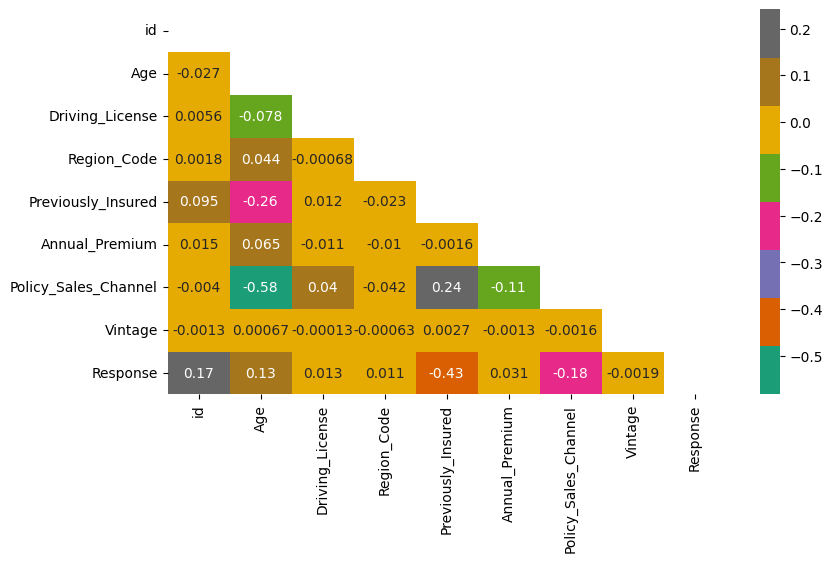

In [11]:
plt.figure(figsize=(9,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2')

In [12]:
correlation = pd.DataFrame(df_num.corr().Response)
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
Purchase_status = df['Response'].value_counts()
Purchase = pd.DataFrame(Purchase_status)
Purchase['Percentage'] = Purchase['count']/Purchase['count'].sum() * 100
Purchase

,count,Percentage
Response,,
0,319553,83.618908
1,62601,16.381092


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

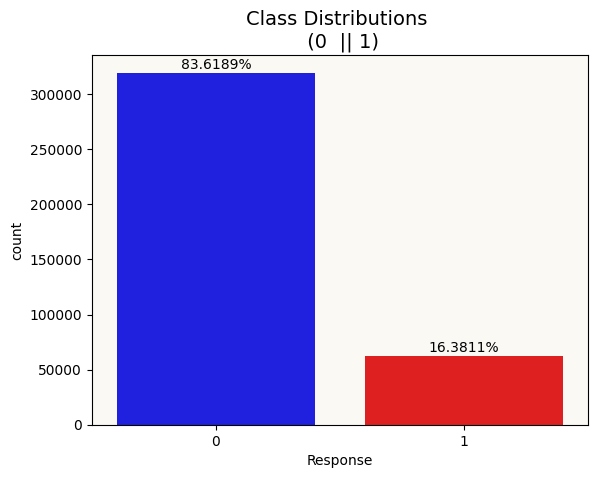

In [15]:
Total = len(df['Response'])
colors = ['blue','red']

ax = sns.countplot(x = 'Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100*p.get_height()/Total:.4f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Class Distributions \n (0  || 1)', fontsize=14)

The classes are imbalance based on percentage

In [16]:
def feature_plot(feature):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x =feature,data=df, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

the countplot is created using the sns.countplot() function, and the annotations for the bar heights are added using a for loop that iterates through each bar patch in the plot and adds a text annotation above it using the ax.annotate() method.

In [17]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10,5))
    ax = sns.catplot(x='Response', col=feature, kind='count', data=df, palette='cool_r')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

catplot() function is used to create multiple countplots (one for each category in the 'feature' column) in a grid arrangement. The annotations for the bar heights are added using nested for loops that iterate through each axis object in the grid and each bar patch in each countplot, and add a text annotation using the ax.annotate() method.

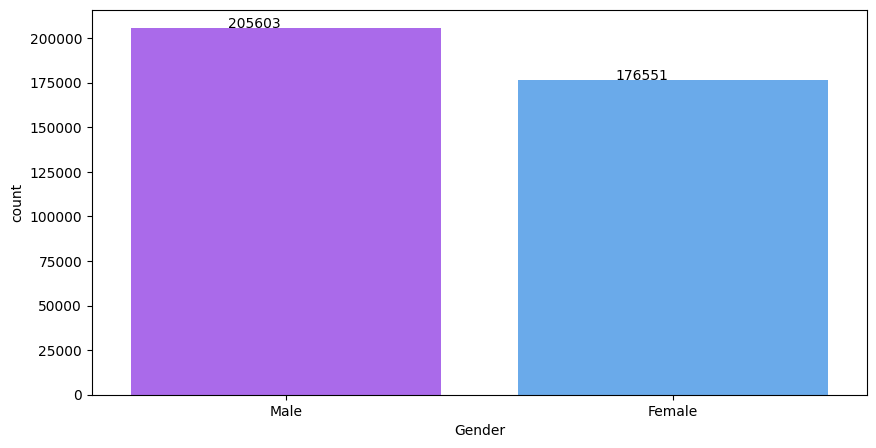

In [18]:
feature_plot('Gender')

<Figure size 1000x500 with 0 Axes>

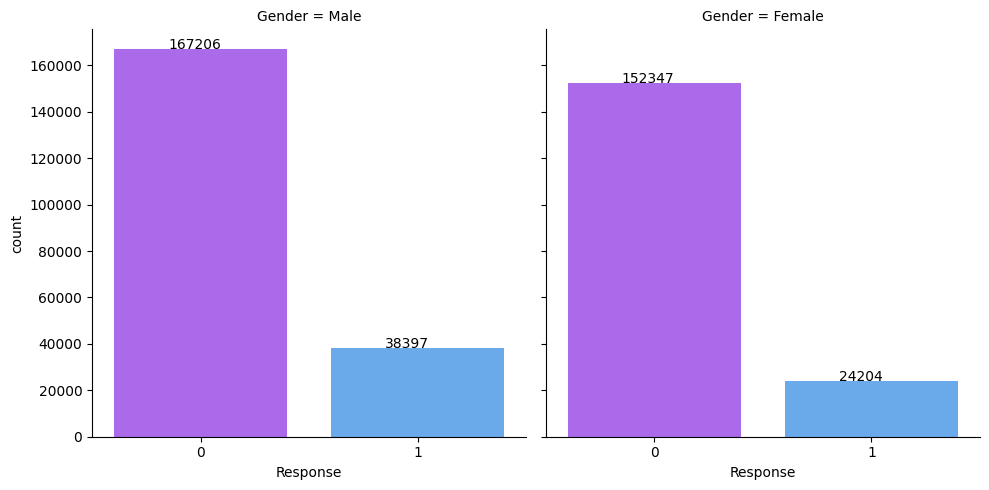

In [19]:
feature_plot_with_target('Gender')

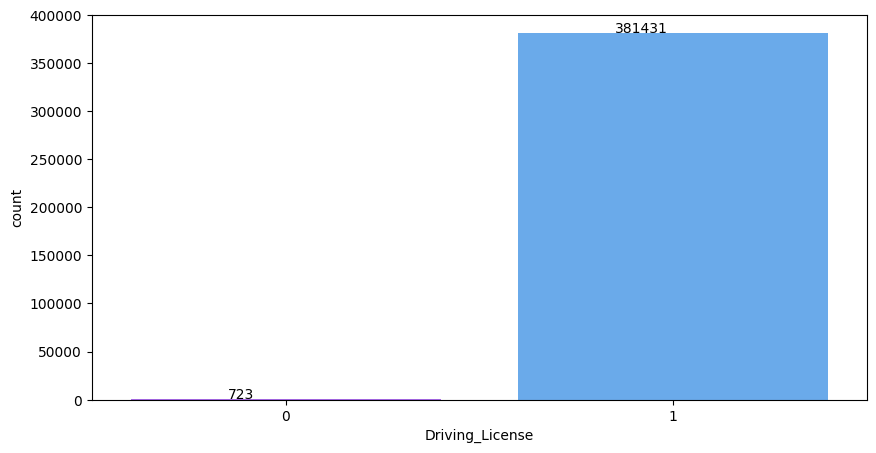

In [20]:
feature_plot('Driving_License')

<Figure size 1000x500 with 0 Axes>

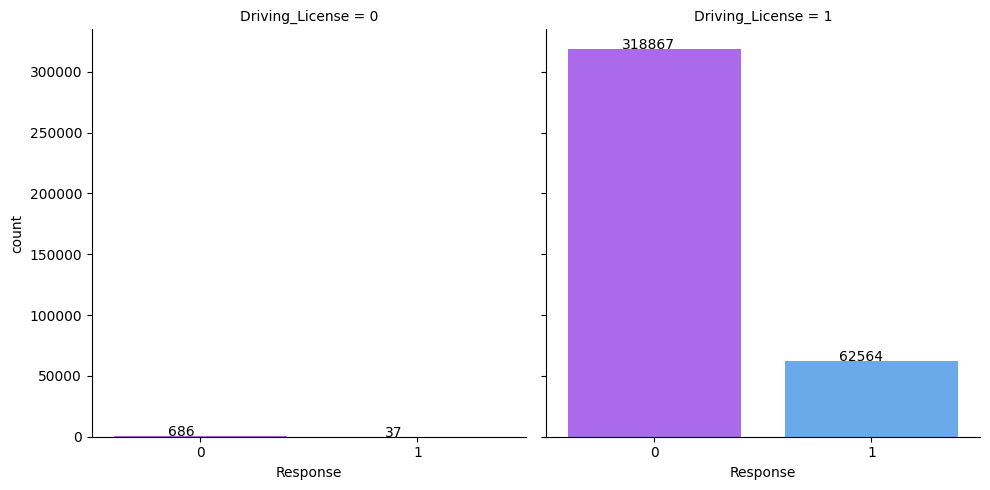

In [21]:
feature_plot_with_target('Driving_License')

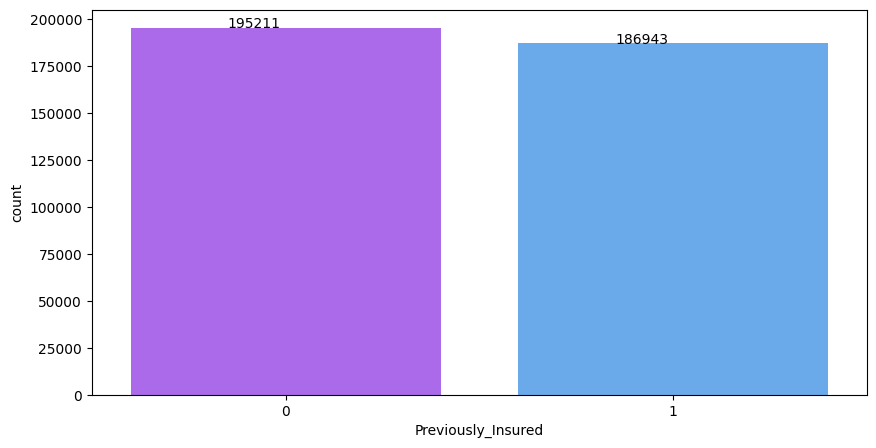

In [22]:
feature_plot('Previously_Insured')

<Figure size 1000x500 with 0 Axes>

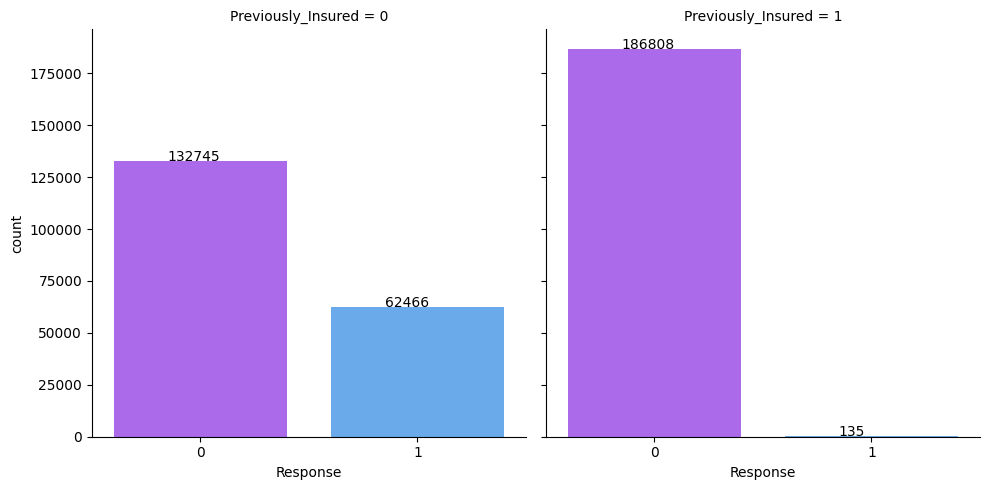

In [23]:
feature_plot_with_target('Previously_Insured')

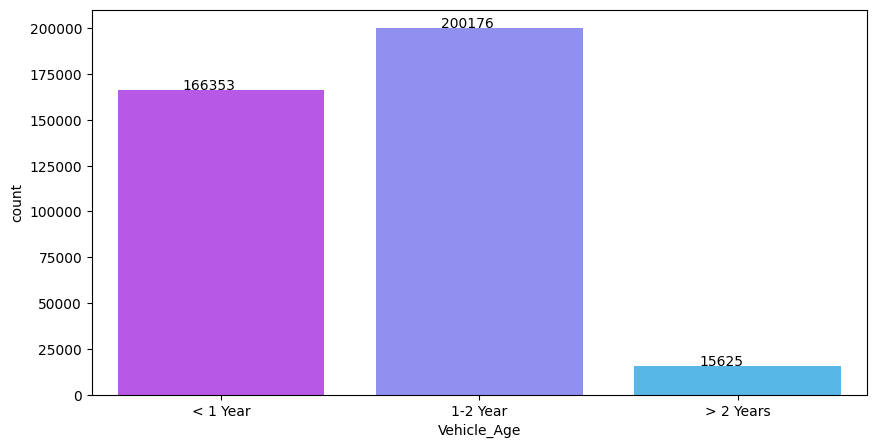

In [24]:
feature_plot('Vehicle_Age')

<Figure size 1000x500 with 0 Axes>

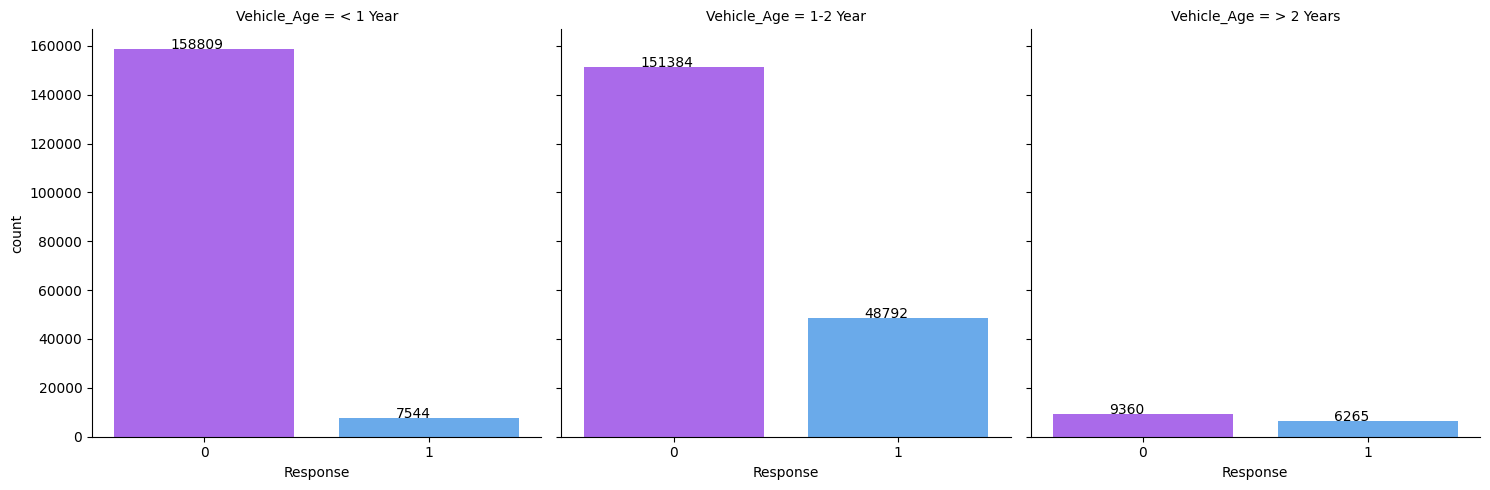

In [25]:
feature_plot_with_target('Vehicle_Age')

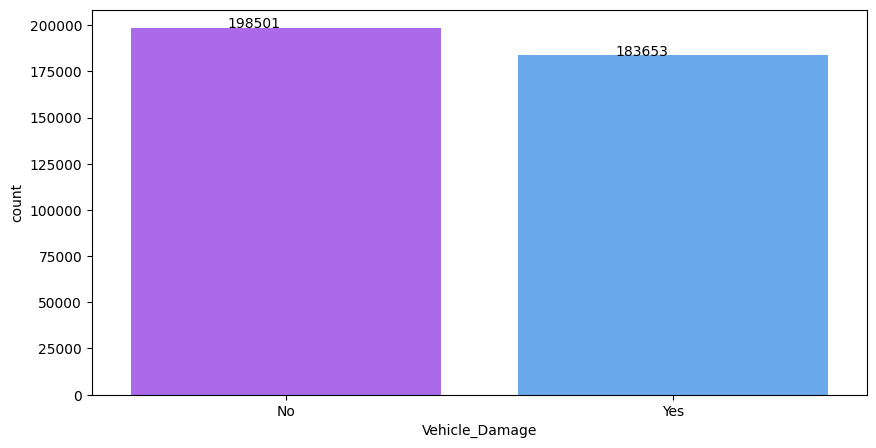

In [26]:
feature_plot('Vehicle_Damage')

<Figure size 1000x500 with 0 Axes>

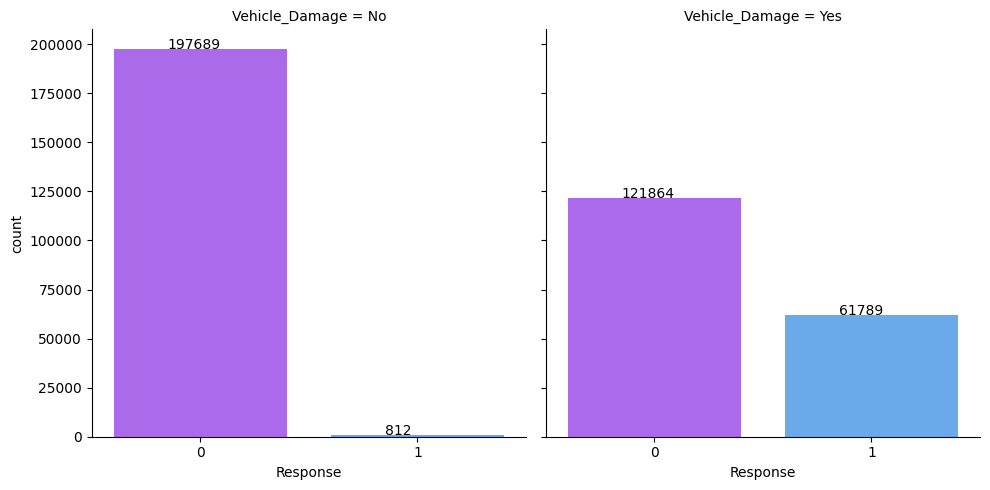

In [27]:
feature_plot_with_target('Vehicle_Damage')

In [28]:
def hist_feat(feature):
    plt.figure(figsize=(10,5))
    sns.histplot(df[feature].dropna(), kde=True, color='purple',bins=30)

In [29]:
def dis_feat_with_target(feature):
    plt.figure(figsize=(8,5))
    sns.displot(data=df, x=feature, hue='Response', kind='kde')

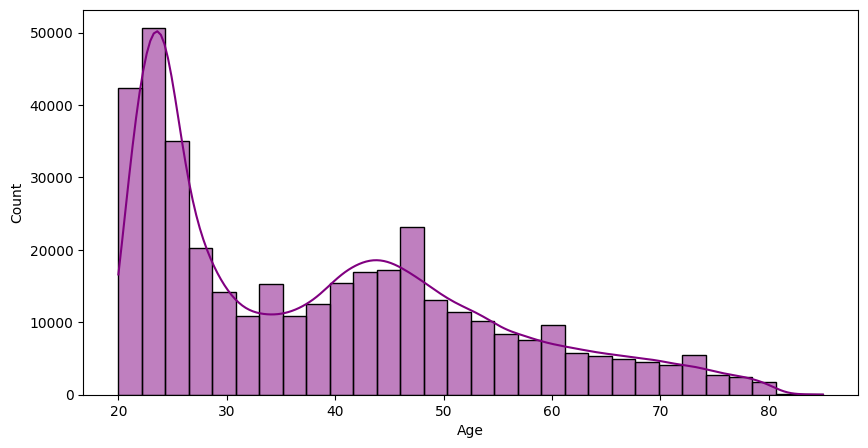

In [30]:
hist_feat('Age')

<Figure size 800x500 with 0 Axes>

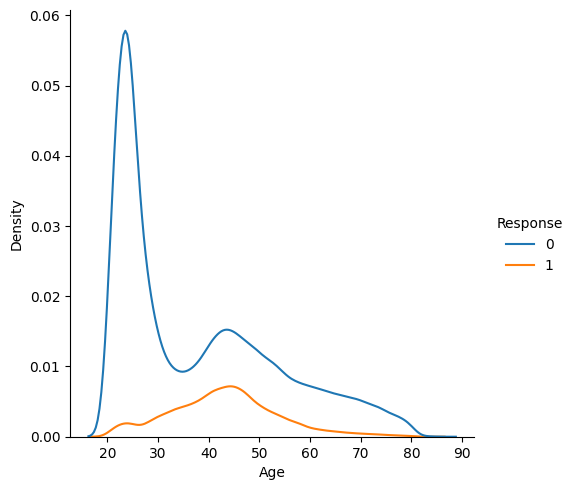

In [31]:
dis_feat_with_target('Age')

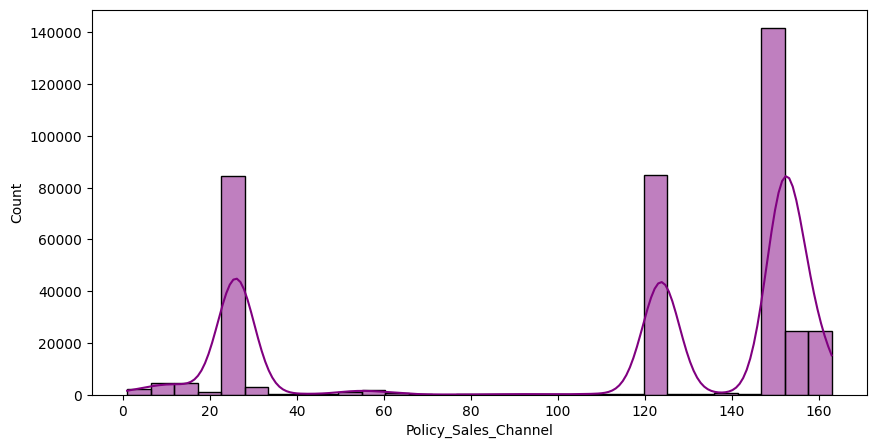

In [32]:
hist_feat('Policy_Sales_Channel')

<Figure size 800x500 with 0 Axes>

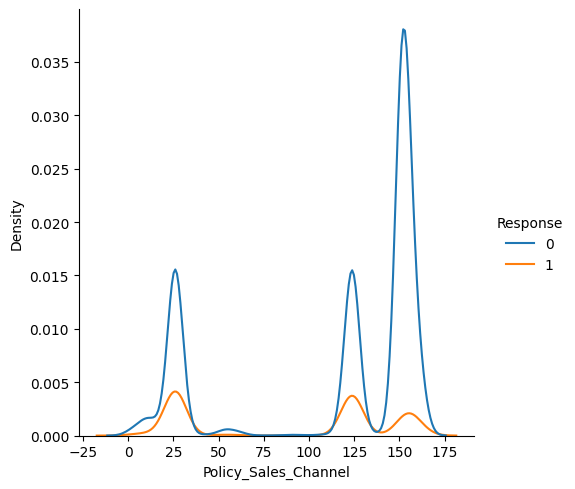

In [33]:
dis_feat_with_target('Policy_Sales_Channel')

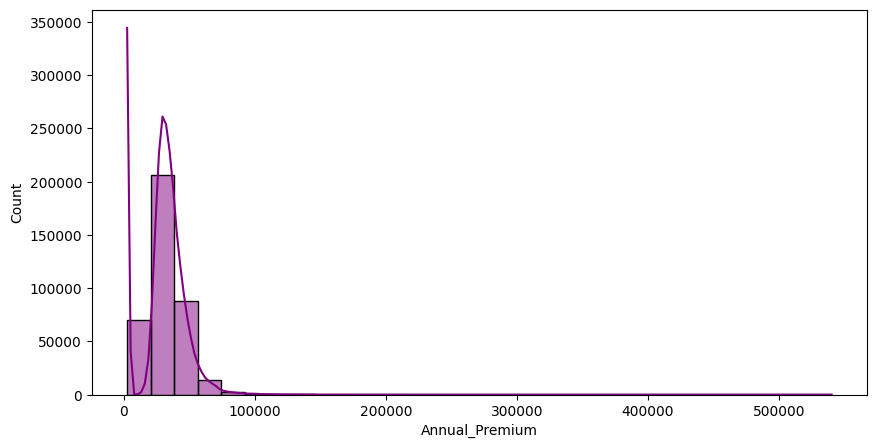

In [34]:
hist_feat('Annual_Premium')

<Figure size 800x500 with 0 Axes>

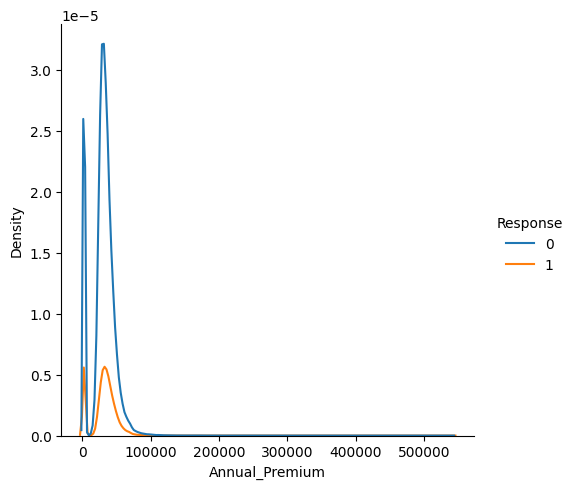

In [35]:
dis_feat_with_target('Annual_Premium')

Text(0.5, 1.0, 'Top 5 region')

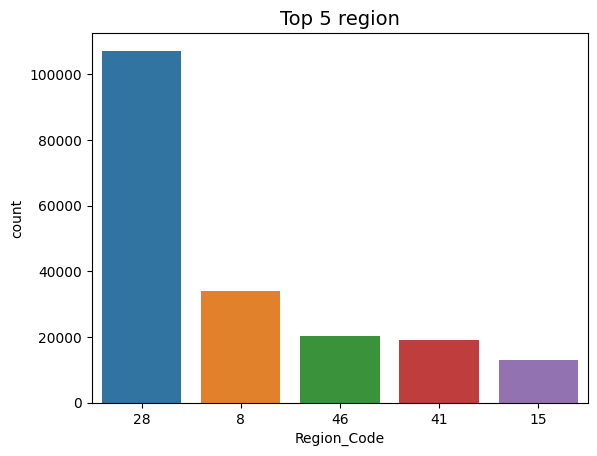

In [36]:
sns.countplot(x = 'Region_Code', data=df, order=df['Region_Code'].value_counts().iloc[:5].index)
plt.title('Top 5 region', fontsize=14)

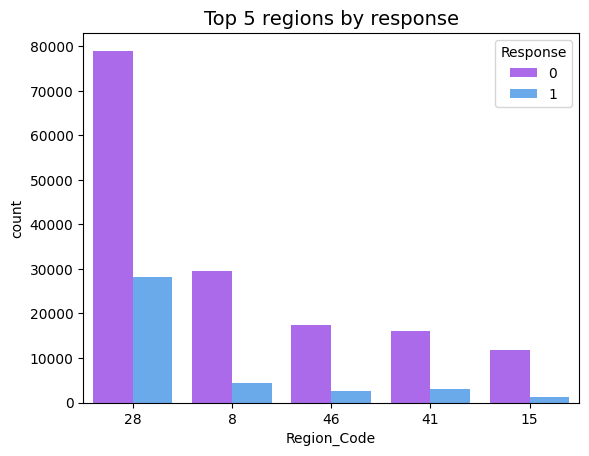

In [37]:
sns.countplot(x='Region_Code', hue='Response', data=df, order=df['Region_Code'].value_counts().iloc[:5].index, palette='cool_r')
plt.title('Top 5 regions by response', fontsize=14)
plt.legend(title='Response', loc='upper right', labels=['0', '1'])

Encoding categorical feature

In [38]:
X = df.drop(['Response'], axis=1)
y = df['Response']
X = pd.get_dummies(X, drop_first=True)
X

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7,1,2630,152,16,True,True,False,False
1,42,1,28,0,43327,26,135,True,False,False,True
2,66,1,33,0,35841,124,253,False,False,False,True
3,22,1,33,0,27645,152,69,False,True,False,False
4,28,1,46,1,29023,152,211,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
382149,24,1,15,0,23938,152,105,True,True,False,True
382150,27,1,28,1,336395,152,144,True,True,False,False
382151,45,1,28,0,40443,26,187,True,False,False,True
382152,28,1,28,1,25380,152,208,False,True,False,False


Split data into training and test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Feature scalling

In [40]:
cols = X_train.columns

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

print('X train.shape=', X_train.shape)
print('X test.shape=', X_test.shape)


X train.shape= (267507, 11)
X test.shape= (114647, 11)


Random Sampling

In [42]:
#Oversample minority class

train_data = pd.concat([X_train, y_train], axis=1)

Response_0 = train_data[train_data['Response'] == 0]
Response_1 = train_data[train_data['Response'] == 1]

In [43]:
upsampled_1 = resample(Response_1,
                       replace=True, #sample with replacement
                       n_samples=len(Response_0), #match number in class
                       random_state=27) #reproducible result

upsampled = pd.concat([Response_0, upsampled_1])

In [44]:
print(y_train.value_counts()) 
print(y_test.value_counts())

Response
0    223800
1     43707
Name: count, dtype: int64
Response
0    95753
1    18894
Name: count, dtype: int64


In [45]:
upsampled['Response'].value_counts()

Response
0.0    223800
1.0    223800
Name: count, dtype: int64

Visualisation of Target of Oversampled minority class

Text(0, 0.5, 'count')

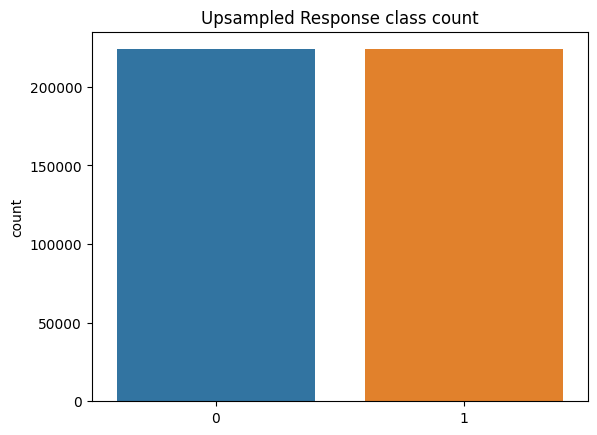

In [46]:
y1 = upsampled.Response.value_counts()
sns.barplot(y=y1, x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

In [47]:
#Undersample majority class

df['Response'].value_counts()

Response
0    319553
1     62601
Name: count, dtype: int64

In [48]:
downsampled_0 = resample(Response_0,
                         replace= False, #Sample without replacement
                         n_samples= len(Response_1), #match minority sample
                         random_state=27) #reproducible results

downsampled = pd.concat([downsampled_0, Response_1])

In [49]:
downsampled['Response'].value_counts()

Response
0.0    43707
1.0    43707
Name: count, dtype: int64

Text(0, 0.5, 'count')

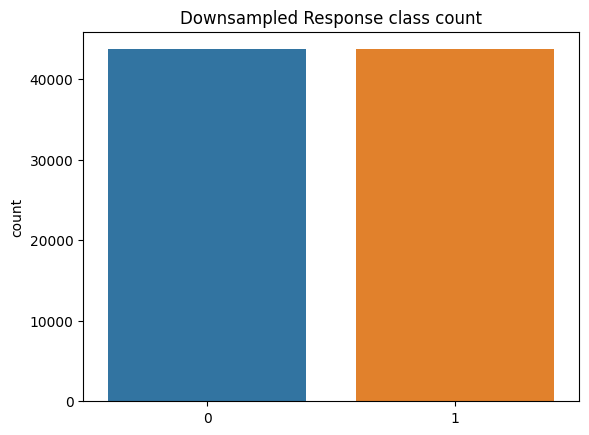

In [50]:
y2 = downsampled['Response'].value_counts()
sns.barplot(y=y2, x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')

SMOTE (Synthetic Minority Over-sampling Technique)

In [51]:
classifier = RandomForestClassifier

smote_pipeline = make_pipeline_imb(SMOTE(random_state=4),
                                   classifier(random_state=42))

smote_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=4)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [52]:
smote_model = smote_pipeline.fit(X_train, y_train)
smote_model

Pipeline(steps=[('smote', SMOTE(random_state=4)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [53]:
y_train.shape

(267507,)

In [54]:
smote_prediction = smote_pipeline.fit(X_train, y_train)

In [55]:
print('Before: Normal data distribution: {}'.format(Counter(y)))

X_smote, y_smote = SMOTE().fit_resample(X,y)
print('After: SMOTE data distribution: {}'.format(Counter(y_smote)))


Before: Normal data distribution: Counter({0: 319553, 1: 62601})
After: SMOTE data distribution: Counter({0: 319553, 1: 319553})


In [57]:
from sklearn.metrics import confusion_matrix

In [66]:
smote_prediction = smote_pipeline.predict(X_test)

In [67]:
print("Confusion Matrix: ")
cm  = confusion_matrix(y_test, smote_prediction)
print(cm)

Confusion Matrix: 
[[83991 11762]
 [ 7859 11035]]


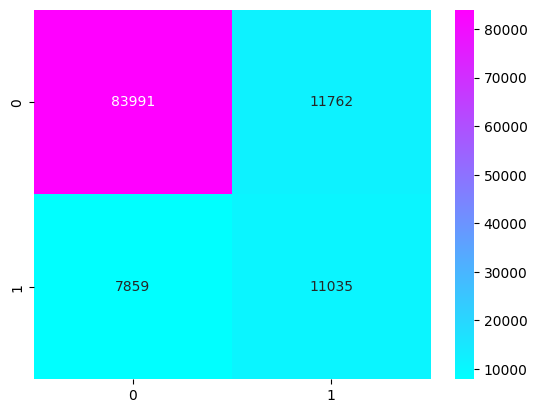

In [68]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [69]:
print('Test Accuracy is  : ', (metrics.accuracy_score(y_test, smote_prediction))) 

Test Accuracy is  :  0.8288572749395972
